# Downloading arabic NLP tools

In [3]:
!pip install transformers==4.12.2
!pip install farasapy==0.0.14
!pip install pyarabic==0.6.14
!git clone https://github.com/aub-mind/arabert
!pip install emoji==1.6.1
!pip install sentencepiece==0.1.96

  Attempting uninstall: packaging
    Found existing installation: packaging 20.8
    Uninstalling packaging-20.8:
      Successfully uninstalled packaging-20.8

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vaex-arrow 0.4.2 requires pyarrow>=0.15, but you have pyarrow 0.10.0 which is incompatible.
botocore 1.18.18 requires urllib3<1.26,>=1.20, but you have urllib3 1.26.6 which is incompatible.



  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0


Cloning into 'arabert'...


  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169294 sha256=65fd2a309bf18f75781981ae961920eb653deee5a58dd92a9ec1b55e8774c8c0
  Stored in directory: c:\users\zd\appdata\local\pip\cache\wheels\6d\32\33\4c6bb366a60f8f33654b6476d4357832165aa8abec715c7171
Successfully built emoji


# Importing the tools

In [26]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas
import seaborn as sns 

from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import torch
import random
import copy

from arabert.preprocess import ArabertPreprocessor

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)

from torch.utils.data import DataLoader, Dataset

from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)

from transformers.data.processors.utils import InputFeatures

from termcolor import colored

import torch
%matplotlib inline

# Read the Data

In [4]:
df = pd.read_csv("prepared.csv",index_col=0)
df

,id,dialect,Comment
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


# EDA

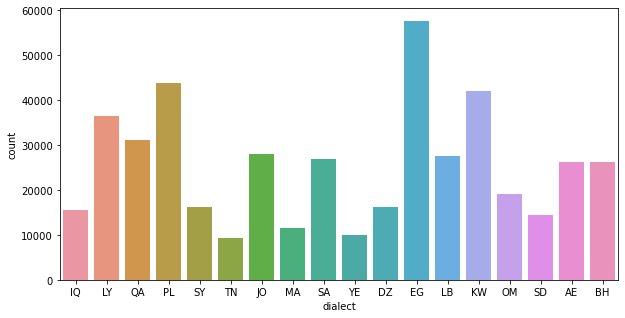

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="dialect");

unbalanced classes detected whic can be solved by upper sampling or down sampling

In [6]:
df["dialect"].value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

### show some comments to gain intiuation about the difference of each dialect comment 

In [7]:
for i in df.dialect.unique():
    print(df[df["dialect"]==i].iloc[0,-1],colored("=============> comment from","red"),colored(f" {i}\n","blue"))

@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير . =============> comment from  IQ

@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم. =============> comment from  LY

@UAE_kalashinkov @monaalyafee @almayassahamad @TamimBinHamad @hamadjjalthani @saoud_k_althani @q6r @mohdalsuwaidi7 @m_aldhoori @YahyaSAltaleedi @damoa_alsamt @om_falah1 @bu_salem7279 @alasmari @Bu5alid87 @UAE1VIPAHMED @Dralnoaimi @bin_dhahii من شفتك حاط صورة ولد النعاشه النجس وانا غاسل يدي يالكوووور قطر عزها الله من دونكم يالسلق =============> comment from  QA

@Mi_Amore_Qtr @FahadBuzwair جمعتهم بالصرماية 
عصبن عن شارب عادل الجبير =============> comment from  PL

يخسى شارب من بغانا 
حنا للعليا سنام 
المراجل كار أهلنا 
وعزمنا دايم حديد 
لا نكل ولانمل 
ولاعرفنا يوم انهزام 
#درعا_مقبرة_الغزاة 
https://t.co/AsFxE6xN2j =============> comment from  SY

#ناس_بكري_قالوا

طيح وشوف شكون يوقف معاك غيب وشوف شكون يسأل عليك و بعد غربل و صفي...!
#مثل_شعبي_تونسي
#تونس_المزيان

### Are there any nulls?

In [8]:
df.isnull().any()

id         False
dialect    False
Comment    False
dtype: bool

### are there any duplicates ?

In [9]:
df.duplicated().any()

False

no null or duplicates exited so our data can't be affected by them

# NLP

In [10]:
# split train and test data
train, test = train_test_split(
    df, test_size=0.2, random_state=42)

In [11]:
# store all dialect label in a list for futher usage
label_list = list(df["dialect"].unique())
label_list

['IQ',
 'LY',
 'QA',
 'PL',
 'SY',
 'TN',
 'JO',
 'MA',
 'SA',
 'YE',
 'DZ',
 'EG',
 'LB',
 'KW',
 'OM',
 'SD',
 'AE',
 'BH']

## Preprocess data¶

In [12]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: list([pd.DataFrame]),
        test: list([pd.DataFrame]),
        label_list: list([str]),
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [13]:
all_datasets=[]
datal = CustomDataset(
    "data", train, test, label_list
)

all_datasets.append(datal)

In [15]:
df2=copy.deepcopy(df)
df2

,id,dialect,Comment
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [16]:
model_name = 'aubmindlab/bert-base-arabertv02-twitter'
arabic_prep = ArabertPreprocessor(model_name)

train["Comment"] = train["Comment"].apply(lambda x: arabic_prep.preprocess(x))
test["Comment"] = test["Comment"].apply(lambda x: arabic_prep.preprocess(x))  

train

,id,dialect,Comment
429058,1166523077959868416,AE,[مستخدم] وريني وفيدني كيف ممكن تحدد شو يشوفون ...
310251,1126192932090974208,LB,بتحس لبيعلق مع جريدة الاخبار متل اللي بيعلق مع...
177498,1114882184412827648,JO,مين مثلي بس إخلص أكل بقول يع مش زاكي وهوة بكون...
339590,1144697104218108032,KW,[مستخدم] [مستخدم] لكن ما يمنع أنك تقولها كدعاء...
363751,1172184850503229440,KW,[مستخدم] [مستخدم] [مستخدم] زين تسوين فيهم ينرف...
...,...,...,...
259178,932902979405008768,EG,انتوا ياخوانا حد يحبنا بقى عيب كده [رابط]
365838,726524867114373120,KW,[مستخدم] غازي القهيدي مظلوم مايستحق قلتوا كل ا...
131932,1157595372795117568,SY,[مستخدم] من اتفه المطربين عملوها مطربه غصب وين...
146867,1156110669613342720,TN,واحد كيما # رضا _ شرف _ الدين متاع ليتوال ترشح...


In [17]:
tok = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Training Sentence Lengths: 


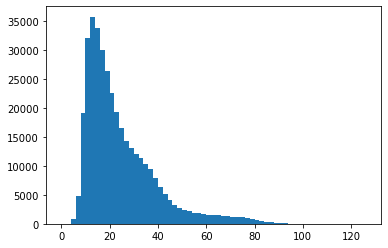

Testing Sentence Lengths: 


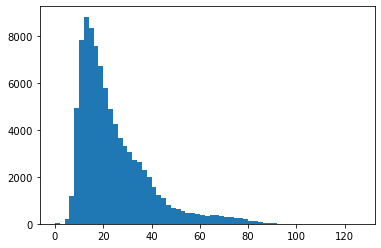

In [18]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in train["Comment"].to_list()],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in test["Comment"].to_list()],bins=range(0,128,2))
plt.show()

Let's select 100 as our maximum sentence length, and check how many sequences will be truncated

In [20]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in train["Comment"].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in test["Comment"].to_list()]))

Truncated training sequences:  69
Truncated testing sequences:  21


In [25]:
train.to_csv("train.csv")
test.to_csv("test.csv")